In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import datetime 
from geopy import distance

In [3]:
data_types = {
    "rideable_type": "category", 
    "start_station_name": "category", 
    "end_station_name": "category", 
    "member_casual":"category",
    # "ride_id":"uint32",
    "time_of_day":"category",
    "trip_type":"category"}

# data_types = {
#     ("rideable_type","start_station_name","end_station_name","member_casual", "time_of_day","trip_type") : "category",
#     "ride_id":"uint32"
#     }

In [4]:
# bikes = pd.read_csv("bikes_clean.csv", dtype = data_types, parse_dates= ["started_at", "ended_at"], low_memory=False)

In [5]:
# bikes3.info()

In [6]:
bikes = pd.read_csv("/Users/pablosoriano/Documents/Data Science/Code Academy/projects/project_3_ capitalbikeshare/CBS_2021-2023_Full.csv", dtype = data_types, parse_dates= ["started_at", "ended_at"], low_memory=False)
# bikes3 = pd.read_csv("/Users/pablosoriano/Documents/Data Science/Code Academy/projects/project_3_ capitalbikeshare/bikes_clean.csv", low_memory=False)

#TODO -  make samples of the whole data set to reduce the processing time. Could do 1000 (random) rows per month => 12.000 rows per year ==> 36.000 rows in total

# Data Wrangling

In [7]:
bikes.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
5,0FD3B4B2152425C3,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,NaN,Georgia Ave & Kennedy St NW,31415.0,38.930000,-77.030000,38.956738,-77.027940,casual
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual
7,78894BDABD9F21DD,electric_bike,2021-01-01 00:20:40,2021-01-01 00:35:36,Columbia Rd & Georgia Ave NW,31115.0,NaN,NaN,38.928081,-77.023768,38.900000,-77.020000,casual
8,CB36F43FA77E4A35,docked_bike,2021-01-01 00:21:19,2021-01-01 00:33:31,15th & F St NE,31632.0,1st & M St SE,31650.0,38.897195,-76.983575,38.876893,-77.006072,casual
9,874D92427D41BC30,classic_bike,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131.0,14th & R St NW,31202.0,38.934405,-77.032687,38.913046,-77.032008,member


In [8]:
bikes.shape

(10693997, 13)

In [9]:
# Convert categorical columns to category type for memory efficiency
# bikes2= bikes.copy()
# bikes2["rideable_type"] = bikes2["rideable_type"].astype("category")
# bikes2["start_station_name"] = bikes2["start_station_name"].astype("category")
# bikes2["end_station_name"] = bikes2["end_station_name"].astype("category")
# bikes2["member_casual"] = bikes2["member_casual"].astype("category")

# Regenerate the entire ride_id column with sequential integers and convert it
# to a memory-efficient data type (uint32)
bikes['ride_id'] = pd.Series(range(1, len(bikes) + 1), dtype='uint32')

In [10]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             uint32        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(4), datetime64[ns](2), float64(4), object(2), uint32(1)
memory usage: 754.8+ MB


## handling missing / incomplete data

In [11]:
# missing values
bikes.isna().any()
bikes.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

determine the latitude/long coordinates for each station
do a for loop creating a range of max and min, latitude and longitud, for each station. 
Use this range to input missing values.

In [12]:
# bikes[bikes["end_station_id"]==31015.0]
# # transform coordinates into float
# bikes2= bikes.copy()

# # bikes2.astype({"start_lat": float})
# bikes2.astype({"start_lat": float, "start_lng": float, "end_lat":float, "end_lng":float})

## formatting

In [13]:
bikes["start_station_id"]=bikes["start_station_id"].str.replace(".0","")
bikes["end_station_id"]=bikes["end_station_id"].str.replace(".0","")

## unique values

In [14]:
# # unique values before formatting
# # Filter the DataFrame for object columns
# non_numeric = bikes.select_dtypes("object")

# # Loop through columns
# for x in non_numeric.columns:
  
#   # Print the number of unique values
#   print(f"Number of unique values in {x} column: ", non_numeric[x].nunique())

# # Filter the DataFrame for object columns
# non_numeric = bikes2.select_dtypes("object")

# # Loop through columns
# for x in non_numeric.columns:
  
#   # Print the number of unique values
#   print(f"Number of unique values in {x} column: ", non_numeric[x].nunique())

  ##NOTE - removing the '.0" at the end of station id reduced the amount of unique values by 600


In [15]:
bikes.isna().any()
bikes.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

## Dealing with missing values

In [16]:
# # Determine a range of latitude and longitud (max and min) for each station
# coordinate_columns = bikes2[["start_lat","start_lng","end_lat","end_lng"]]

# # bikes2[bikes2["start_station_name"]=="10th & U St NW"].nlargest(1, "start_lat")
# print("max_latitude: ", bikes2[bikes2["start_station_name"]=="10th & U St NW"].nlargest(1,"start_lat")["start_lat"])
# print("min_latitude: ",bikes2[bikes2["start_station_name"]=="10th & U St NW"].nsmallest(1,"start_lat")["start_lat"])

# # filter = bikes2["start_station_name"]=="10th & U St NW"
# # filter

## Step 1: Create a Station Boundary Lookup
Create a DataFrame containing the station IDs along with their latitude and longitude ranges.





In [17]:
# station_bounds = bikes2.groupby("start_station_id").agg({
#     "start_lat": ["min", "max"],
#     "start_lng": ["min", "max"]
# }).reset_index()

# # Flatten multi-level column names
# station_bounds.columns = ["start_station_id", "min_lat", "max_lat", "min_lng", "max_lng"]

In [18]:
# station_bounds["centroid_lat"] = (station_bounds["min_lat"] + station_bounds["max_lat"]) / 2
# station_bounds["centroid_lng"] = (station_bounds["min_lng"] + station_bounds["max_lng"]) / 2
# station_bounds

## Step 2: Define a Function to Match Coordinates
Create a function that takes the latitude and longitude of a row and finds the start_station_id that falls within the corresponding range.

how is it possible that there are more unique values in the id columns than in the name columns? they should be the same. one possible explanation is that one station_name has multiple station_id's

In [19]:
# def find_station_id(lat, lng, station_bounds):
#     # Filter the station bounds for matches
#     matches = station_bounds[
#         (station_bounds["min_lat"] <= lat) & 
#         (station_bounds["max_lat"] >= lat) & 
#         (station_bounds["min_lng"] <= lng) & 
#         (station_bounds["max_lng"] >= lng)]
#     print(f"Lat: {lat}, Lng: {lng}, Matches:\n{matches}")
    
#     # If exactly one match, return the station ID
#     if len(matches) == 1:
#         return matches["start_station_id"].iloc[0]
#     elif len(matches) > 1:
#         # Calculate distances to the centroid of each matching station
#         matches["distance"] = np.sqrt(
#             (matches["centroid_lat"] - lat) ** 2 + 
#             (matches["centroid_lng"] - lng) ** 2
#         )
#         # Return the station ID with the smallest distance
#         return matches.loc[matches["distance"].idxmin(), "start_station_id"]
#     return None

# test_row = bikes2.iloc[0]
# print(find_station_id(test_row["start_lat"], test_row["start_lng"], station_bounds))


## Step 3: Apply the Function to Fill Missing Values
Use the .apply() method to fill the missing start_station_id values.

In [20]:
# bikes2["start_station_id"] = bikes2.apply(
#     lambda row: find_station_id(row["start_lat"], row["start_lng"], station_bounds)
#     if pd.isnull(row["start_station_id"]) else row["start_station_id"],
#     axis=1
# )

In [21]:
# test_row = bikes2.iloc[0]  # Replace with a specific row index
# print(find_station_id(test_row["start_lat"], test_row["start_lng"], station_bounds))

In [22]:
# missing_count = bikes2["start_station_id"].isnull().sum()
# print(f"Remaining missing start_station_id values: {missing_count}")

In [23]:
# print(f"Latitudes: {bikes2['start_lat'].min()} - {bikes2['start_lat'].max()}")
# print(f"Longitudes: {bikes2['start_lng'].min()} - {bikes2['start_lng'].max()}")

# print(f"Station Bounds Latitude: {station_bounds['min_lat'].min()} - {station_bounds['max_lat'].max()}")
# print(f"Station Bounds Longitude: {station_bounds['min_lng'].min()} - {station_bounds['max_lng'].max()}")

# KNN

In [24]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# encoder = LabelEncoder()

# # Encode the non-null values of start_station_id
# bikes2["start_station_id_encoded"] = bikes2["start_station_id"]
# bikes2.loc[bikes2["start_station_id"].notnull(), "start_station_id_encoded"] = encoder.fit_transform(
#     bikes2.loc[bikes2["start_station_id"].notnull(), "start_station_id"])

In [25]:
# from sklearn.impute import KNNImputer

#REVIEW - TAKES WAY TO LONG TO DO IT LIKE THIS, 4 HS AND STILL GOING
# # Prepare the data for imputation
# knn_data = bikes2[["start_lat", "start_lng", "start_station_id_encoded"]]

# # Initialize the KNN Imputer
# knn_imputer = KNNImputer(n_neighbors=3, weights="distance")


# # Perform the imputation
# knn_imputed = knn_imputer.fit_transform(knn_data)

# # Update the imputed values in the DataFrame
# bikes2["start_station_id_encoded"] = knn_imputed[:, 2]

# Use grid cell to impute missing values

In [26]:
bikes2 = bikes.copy()

In [27]:
# bikes2["start_lat_filled"] = bikes2["start_lat"].fillna(0)
# bikes2["start_lng_filled"] = bikes2["start_lng"].fillna(0)

# # Create grid cells using the filled coordinates
# grid_size = 0.001  # Approx. ~100mts
# bikes2["grid_cell"] = (
#     (bikes2["start_lat_filled"] // grid_size).astype(int).astype(str) + "_" +
#     (bikes2["start_lng_filled"] // grid_size).astype(int).astype(str)
# )

# bikes2["grid_cell"].head()


In [28]:
# known = bikes2.dropna(subset=["start_station_id"])

# # Map each grid cell to the most frequent station ID
# grid_to_station = known.groupby("grid_cell")["start_station_id"].agg(lambda x: x.mode()[0]).to_dict()

# grid_to_station

In [29]:
# bikes2.loc[bikes2["start_station_id"].isnull(), "start_station_id"] = bikes2["grid_cell"].map(grid_to_station)

In [30]:
# print(f"missing values before imputation: {bikes["start_station_id"].isna().sum()}")
# print(f"missing values after imputation: {bikes2["start_station_id"].isna().sum()}")

In [31]:
# bikes2["end_station_id"].isna().sum()

In [32]:
# ## missing values for end station id

# bikes2["end_lat_filled"] = bikes2["end_lat"].fillna(0)
# bikes2["end_lng_filled"] = bikes2["end_lng"].fillna(0)

# # Create grid cells using the filled coordinates
# grid_size = 0.001  # Approx. 100 meters
# bikes2["grid_cell_end"] = (
#     (bikes2["end_lat_filled"] // grid_size).astype(int).astype(str) + "_" +
#     (bikes2["end_lng_filled"] // grid_size).astype(int).astype(str)
# )

# bikes2["grid_cell_end"].head()
# known = bikes2.dropna(subset=["end_station_id"])

# # Map each grid cell to the most frequent station ID
# grid_to_station = known.groupby("grid_cell_end")["end_station_id"].agg(lambda x: x.mode()[0]).to_dict()

# grid_to_station
# bikes2.loc[bikes2["end_station_id"].isnull(), "end_station_id"] = bikes2["grid_cell_end"].map(grid_to_station)

In [33]:
# print(f"missing values before imputation: {bikes["end_station_id"].isna().sum()}")
# print(f"missing values after imputation: {bikes2["end_station_id"].isna().sum()}")

In [34]:
# bikes2["end_station_id"].isna().sum()

In [ ]:
# bikes2.duplicated().sum()

np.int64(0)

In [38]:
bikes2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,38.920870,-77.031691,member
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926,Wilson Blvd. & N. Vermont St.,31926,38.879477,-77.114563,38.879477,-77.114563,member
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member


In [39]:
bikes3= bikes.copy()

In [40]:
# bikes3 = bikes3.drop(["start_lat", "start_lng","end_lat","end_lng","grid_cell_end", "grid_cell"], axis=1)

In [41]:
# bikes3 = bikes3.rename(columns={"start_lat_filled":"start_lat", "start_lng_filled":"start_lng", "end_lng_filled":"end_lng", "end_lat_filled":"end_lat"})

# EDA

## working with dates and times

In [42]:
bikes3["start_time"]=bikes3["started_at"].dt.time
bikes3["end_time"]=bikes3["ended_at"].dt.time
bikes3["start_hour"]=bikes3["started_at"].dt.hour
bikes3["end_hour"]=bikes3["ended_at"].dt.hour
bikes3['year'] = bikes3['started_at'].dt.year
bikes3['month'] = bikes3['started_at'].dt.month
bikes3['day'] = bikes3['started_at'].dt.day
bikes3['dow'] = bikes3['started_at'].dt.dayofweek
bikes3['weekend'] = np.where(bikes3['dow'].isin([5, 6]), 1, 0)



In [43]:
# create trip duration column
bikes3["trip_duration_minutes"] = np.round((bikes3["ended_at"] - bikes3["started_at"]) / np.timedelta64(1,"m"),0)



# check avg and mode bike rides

print(f"trip duration mode: {list(bikes3["trip_duration_minutes"].mode())}")
print(f"trip duration avg: {bikes3["trip_duration_minutes"].mean()}")

# create categories for morning, afternoon, evening, night

bikes3['time_of_day'] = bikes3['start_hour'].apply(lambda value: 'morning' if value in (4,5,6,7,8,9,10,11)
                                                        else 'afternoon' if value in (12,13,14,15,16)
                                                        else 'evening' if value in (17,18,19,20,21) 
                                                        else 'night')

bikes3['time_of_day'] = pd.Categorical(bikes3['time_of_day'],
categories=["morning","afternoon","evening","night"])




trip duration mode: [6.0]
trip duration avg: 22.906806220349605


In [44]:
bikes3['time_of_day'] = pd.Categorical(bikes3['time_of_day'],
categories=["morning","afternoon","evening","night"])

In [45]:
sample = bikes3.sample(n=10, axis=0)
sample

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_time,start_hour,end_hour,year,month,day,dow,weekend,trip_duration_minutes,time_of_day
4640386,4640387,electric_bike,2022-07-27 17:59:56,2022-07-27 18:10:14,7th & S St NW,31130,15th St & Constitution Ave NW,31321,38.914145,-77.021652,...,18:10:14,17,18,2022,7,27,2,0,10.0,evening
537648,537649,classic_bike,2021-04-27 07:05:37,2021-04-27 07:10:58,20th St & Florida Ave NW,31110,24th & N St NW,31255,38.915400,-77.044600,...,07:10:58,7,7,2021,4,27,1,0,5.0,morning
743206,743207,classic_bike,2021-05-22 11:37:30,2021-05-22 11:47:10,New Jersey Ave & R St NW,31509,California St & Florida Ave NW,31116,38.912659,-77.017669,...,11:47:10,11,11,2021,5,22,5,1,10.0,morning
4743898,4743899,classic_bike,2022-08-05 08:05:02,2022-08-05 08:21:48,14th & Belmont St NW,31119,North Capitol St & G Pl NE,31637,38.921074,-77.031887,...,08:21:48,8,8,2022,8,5,4,0,17.0,morning
10099491,10099492,electric_bike,2023-11-04 07:10:55,2023-11-04 07:18:11,15th & Euclid St NW,31117,14th & Irving St NW,31124,38.923516,-77.035092,...,07:18:11,7,7,2023,11,4,5,1,7.0,morning
2532564,2532565,classic_bike,2021-11-26 10:41:38,2021-11-26 10:58:35,21st St & G st NW,31328,15th & W St NW,31125,38.898302,-77.046913,...,10:58:35,10,10,2021,11,26,4,0,17.0,morning
6520744,6520745,classic_bike,2023-02-14 07:14:11,2023-02-14 07:35:43,39th & Veazey St NW,31308,19th St & Pennsylvania Ave NW,31100,38.943837,-77.077078,...,07:35:43,7,7,2023,2,14,1,0,22.0,morning
9708904,9708905,electric_bike,2023-10-09 21:38:11,2023-10-09 21:56:21,Union Market,31517,14th & Harvard St NW,31105,38.907971,-76.997008,...,21:56:21,21,21,2023,10,9,0,0,18.0,evening
3211490,3211491,classic_bike,2022-03-25 09:23:32,2022-03-25 09:56:20,14th & Newton St NW,31649,3000 Connecticut Ave NW / National Zoo,31307,38.931991,-77.032956,...,09:56:20,9,9,2022,3,25,4,0,33.0,morning
6446486,6446487,classic_bike,2023-02-03 13:17:47,2023-02-03 13:24:28,3rd & H St NW,31604,Metro Center / 12th & G St NW,31230,38.899408,-77.015289,...,13:24:28,13,13,2023,2,3,4,0,7.0,afternoon


In [46]:
# create categories for trip duration (short / medium / long)
print(f"Max trip duration : {bikes3["trip_duration_minutes"].max()}")
print(f"Min trip duration : {bikes3["trip_duration_minutes"].min()}")

#TODO - will have to work on the outliers


Max trip duration : 54540.0
Min trip duration : -5626.0


In [47]:
bikes3[bikes3["trip_duration_minutes"] < 0]
#REVIEW - there are some trips where the start and end time seems to be inverted, thus giving negative values of trip time. Will correct it by accepting only

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_time,start_hour,end_hour,year,month,day,dow,weekend,trip_duration_minutes,time_of_day
24607,24608,electric_bike,2021-01-09 11:49:53,2021-01-09 11:15:56,NaN,NaN,3rd & G St SE,31625,38.880000,-77.000000,...,11:15:56,11,11,2021,1,9,5,1,-34.0,morning
41839,41840,electric_bike,2021-01-13 19:52:48,2021-01-13 19:52:13,NaN,NaN,NaN,NaN,38.930000,-77.060000,...,19:52:13,19,19,2021,1,13,2,0,-1.0,evening
96231,96232,electric_bike,2021-01-30 12:52:31,2021-01-30 12:51:19,NaN,NaN,NaN,NaN,38.930000,-77.010000,...,12:51:19,12,12,2021,1,30,5,1,-1.0,afternoon
131049,131050,electric_bike,2021-02-11 21:42:55,2021-02-11 21:41:29,NaN,NaN,NaN,NaN,38.920000,-77.040000,...,21:41:29,21,21,2021,2,11,3,0,-1.0,evening
149468,149469,classic_bike,2021-02-20 16:00:51,2021-02-20 16:00:11,14th & Belmont St NW,31119,14th & Belmont St NW,31119,38.921074,-77.031887,...,16:00:11,16,16,2021,2,20,5,1,-1.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10431568,10431569,electric_bike,2023-12-02 14:00:51,2023-12-02 13:56:26,NaN,NaN,Washington & Independence Ave SW/HHS,31272,38.890000,-77.010000,...,13:56:26,14,13,2023,12,2,5,1,-4.0,afternoon
10539567,10539568,electric_bike,2023-12-12 15:12:59,2023-12-12 15:08:43,NaN,NaN,California St & Florida Ave NW,31116,38.920000,-77.040000,...,15:08:43,15,15,2023,12,12,1,0,-4.0,afternoon
10554917,10554918,electric_bike,2023-12-13 19:24:14,2023-12-13 19:17:37,NaN,NaN,4th & M St SE,31652,38.880000,-77.000000,...,19:17:37,19,19,2023,12,13,2,0,-7.0,evening
10603007,10603008,electric_bike,2023-12-18 16:36:56,2023-12-18 16:33:12,NaN,NaN,14th & Irving St NW,31124,38.930000,-77.030000,...,16:33:12,16,16,2023,12,18,0,0,-4.0,afternoon


In [48]:
abs(bikes3["trip_duration_minutes"].min())

np.float64(5626.0)

In [49]:
# bikes3.to_csv("bikes_clean.csv", index=False)

# dropping rows where trip duration is negative

In [50]:
bikes3 = bikes3.drop(bikes3[bikes3["trip_duration_minutes"] < 0].index)

In [51]:
print(f"Max trip duration : {bikes3["trip_duration_minutes"].max()}")
print(f"Min trip duration : {bikes3["trip_duration_minutes"].min()}")

Max trip duration : 54540.0
Min trip duration : 0.0


## filtering

In [52]:
# Compute the first and third quantiles and IQR 
q1 = np.quantile(bikes3["trip_duration_minutes"], 0.25)
q3 = np.quantile(bikes3["trip_duration_minutes"], 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

bikes_filtered = bikes3[(bikes3["trip_duration_minutes"] > lower) & (bikes3["trip_duration_minutes"] < upper)]

In [53]:
lower

np.float64(-12.5)

In [54]:
pctil_99 = q3 = np.quantile(bikes3["trip_duration_minutes"], 0.97)
pctil_99

np.float64(76.0)

In [55]:
bikes_filtered99= bikes3[(bikes3["trip_duration_minutes"] > lower) & (bikes3["trip_duration_minutes"] < pctil_99)]

In [56]:
print(f"number of rows before iqr filter: {len(bikes3)}")
print(f'number of rows after iqr filter: {len(bikes_filtered)}')
print(f'number of rows after pctil99 filter: {len(bikes_filtered99)}')
print(f'difference between iqr and pctil 99 : {len(bikes_filtered)-len(bikes_filtered99)}')
print(q1)

number of rows before iqr filter: 10693415
number of rows after iqr filter: 9770553
number of rows after pctil99 filter: 10365837
difference between iqr and pctil 99 : -595284
7.0


In [57]:
outliers = (bikes3["trip_duration_minutes"] < lower) | (bikes3["trip_duration_minutes"] > upper)
outlier_percentage = np.sum(outliers) / len(bikes3) * 100
print(f"Percentage of data outside the whiskers (outliers): {outlier_percentage:.2f}%")

Percentage of data outside the whiskers (outliers): 8.63%


For a perfectly normal distribution:

About 0.7% of the data points are expected to lie outside the whiskers.
This is because approximately 99.3% of data in a normal distribution falls within 
±2.698𝜎(where 𝜎 is the standard deviation), which corresponds to the range covered by the whiskers.

For other distributions:
The percentage of outliers can vary widely depending on the shape and spread of the distribution. Skewed, heavy-tailed, or multimodal distributions can result in more data points lying outside the whiskers.

In [58]:
print(f"Max trip duration : {bikes_filtered["trip_duration_minutes"].max()}")
print(f"Min trip duration : {bikes_filtered["trip_duration_minutes"].min()}")

Max trip duration : 39.0
Min trip duration : 0.0


In [59]:
# from scipy.stats import zscore

# bikes3['z_score'] = zscore(bikes3['trip_duration_minutes'])
# # outliers = bikes3[bikes3['z_score'].abs() > 3] 
# bikes_filtered_z= bikes3[bikes3["z_score"].abs()<3]

# print(f"number of rows before z-score filter: {len(bikes3)}")
# print(f'number of rows after z-score filter: {len(bikes_filtered_z)}')
# print(f"Max trip duration : {bikes_filtered_z["trip_duration_minutes"].max()}")
# print(f"Min trip duration : {bikes_filtered_z["trip_duration_minutes"].min()}")

In [60]:
print(bikes3["trip_duration_minutes"].quantile(0.25))
print(bikes3["trip_duration_minutes"].quantile(0.50))
print(bikes3["trip_duration_minutes"].quantile(0.75))


7.0
11.0
20.0


In [61]:
# plt.boxplot(bikes3["trip_duration_minutes"])
# sns.catplot(data=bikes3,kind="box", y="trip_duration_minutes").set(ylim=(0,100))

In [62]:
#1 Create duration labels
duration_labels = ["short_duration", "medium_duration", "long_duration", "extra_long_duration"]

#2 Create duration ranges list
duration_ranges = [0, 15, 30, 45, np.inf]

#3 Create trip_type
bikes3["trip_type"] = pd.cut(bikes3["trip_duration_minutes"],
                                  bins= duration_ranges,
                                  labels=duration_labels)

bikes3[["trip_type", "trip_duration_minutes"]]

bikes3["trip_type"].value_counts()

trip_type
short_duration         6767279
medium_duration        2425111
extra_long_duration     729120
long_duration           665323
Name: count, dtype: int64

In [63]:
# make trip_type categorical and assign it an order
bikes3['trip_type'] = pd.Categorical(bikes3['trip_type'],
categories=['short_duration', 'medium_duration', 'long_duration', "extra_long_duration"])

<Axes: xlabel='trip_type', ylabel='count'>

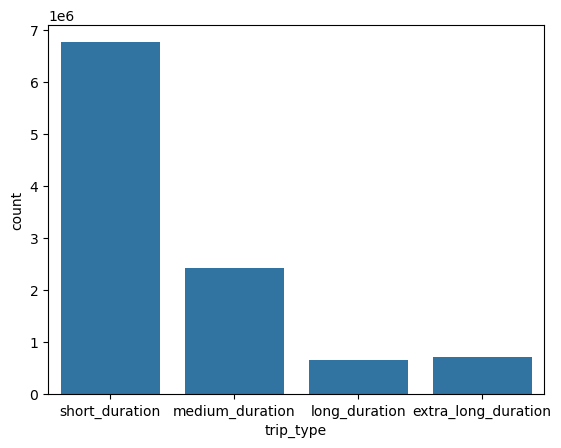

In [64]:
sns.countplot(data=bikes3, x="trip_type")

Which hours has the highest frequency of usage?

In [65]:
start_time_value_counts = bikes3["start_hour"].value_counts()
peak_time = start_time_value_counts.idxmax()

In [66]:
print(f"peak time : {peak_time} hs")

peak time : 17 hs


([<matplotlib.axis.XTick at 0x1f9a713a0>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

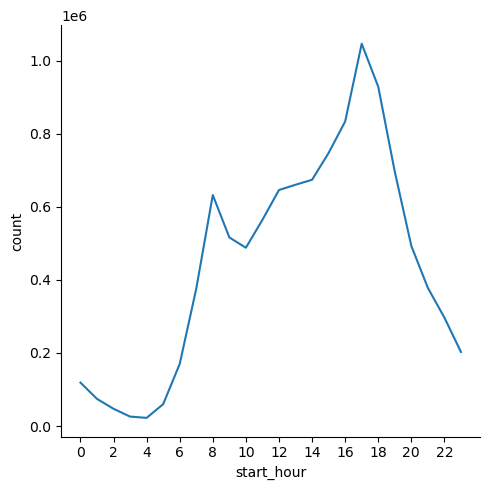

In [67]:
sns.relplot(kind="line", data= start_time_value_counts)
plt.xticks(np.arange(0, 24, 2))

In [68]:
avg_rides_per_hour = bikes3.groupby("start_hour")["ride_id"].mean()

([<matplotlib.axis.XTick at 0x1f9a76150>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

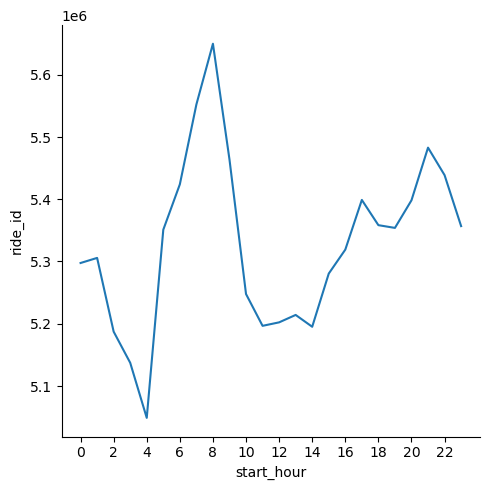

In [69]:
sns.relplot(kind="line", data= avg_rides_per_hour )
plt.xticks(np.arange(0, 24, 2))

In [70]:
week_days = bikes3[bikes3["dow"].isin([0,1,2,3,4])]
weekends = bikes3[bikes3["dow"].isin([5,6])]

([<matplotlib.axis.XTick at 0x1f9a7d9d0>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

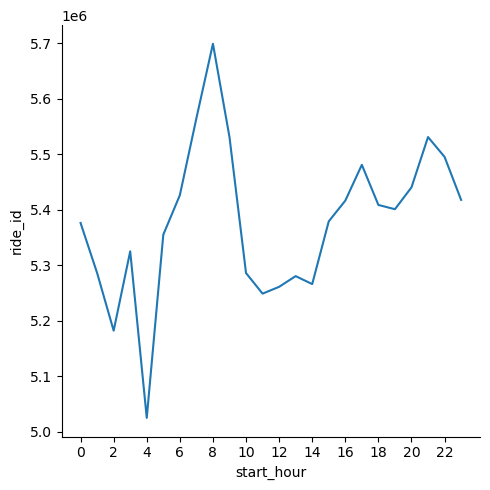

In [71]:
# avg rides weekdays
avg_rides_per_hour_week_days = week_days.groupby("start_hour")["ride_id"].mean()
sns.relplot(kind="line", data= avg_rides_per_hour_week_days )
plt.xticks(np.arange(0, 24, 2))

([<matplotlib.axis.XTick at 0x1d0670ad0>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

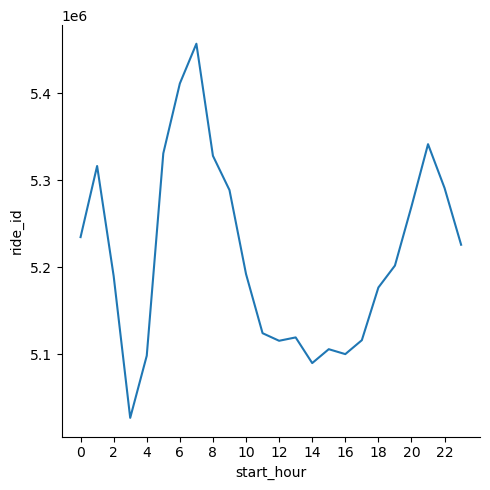

In [72]:
# avg rides weekends
avg_rides_per_hour_weekends = weekends.groupby("start_hour")["ride_id"].mean()
sns.relplot(kind="line", data= avg_rides_per_hour_weekends)
plt.xticks(np.arange(0, 24, 2))

([<matplotlib.axis.XTick at 0x1f9a72840>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

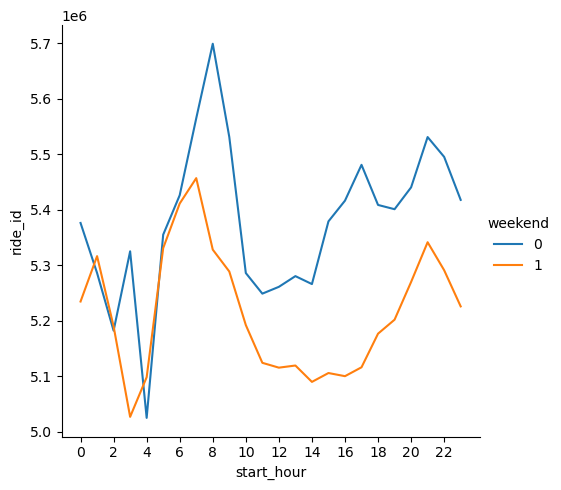

In [73]:
avg_rides_per_hour = bikes3.groupby(["start_hour","weekend"], as_index=False)["ride_id"].mean()

g= sns.relplot(kind="line", data= avg_rides_per_hour, x="start_hour",y="ride_id", hue = "weekend")
# plt.legend(['week_day', 'weekends'])
plt.xticks(np.arange(0, 24, 2))
# g.legend.remove()
# g.add_legend(title="weekends", label_order=["yes","no"])
# # g.legend.set_title("wakaka")
# # g.legend.set_label("yes")


In [74]:
# daily trends
# what types of trip are most popular in the different times of day?
time_of_day_trip_type = bikes3.groupby("time_of_day",observed=False)["trip_type"].value_counts()
time_of_day_trip_type

time_of_day  trip_type          
morning      short_duration         1908460
             medium_duration         590845
             extra_long_duration     157936
             long_duration           142269
afternoon    short_duration         2074869
             medium_duration         845310
             extra_long_duration     328781
             long_duration           276817
evening      short_duration         2265592
             medium_duration         823980
             long_duration           209223
             extra_long_duration     207602
night        short_duration          518358
             medium_duration         164976
             long_duration            37014
             extra_long_duration      34801
Name: count, dtype: int64

In [75]:
unique_times_of_day = bikes3["time_of_day"].unique()
time_of_day_trip_type["afternoon"].idxmax()

for time in unique_times_of_day:
    print(f"preferred trip type in {time}: {time_of_day_trip_type[time].idxmax()} ")

preferred trip type in night: short_duration 
preferred trip type in morning: short_duration 
preferred trip type in afternoon: short_duration 
preferred trip type in evening: short_duration 


does the duration of the trip influence the rideable type ?

In [76]:
bikes3["rideable_type"].value_counts()

rideable_type
classic_bike     7710232
electric_bike    2443713
docked_bike       539470
Name: count, dtype: int64

Pedal bikes must be checked out and returned to a station. E-bikes may be docked at fixed stations or parked anywhere within the defined service area; however, users incur an additional fee when an e-bike is not parked at a station.
Are ebikes parked anywhere assigned to a station?

In [77]:
docked = bikes3[bikes3["rideable_type"] == "docked"]
ebike = bikes3[bikes3["rideable_type"] == "electric_bike"]
classic = bikes3[bikes3["rideable_type"] == "classic_bike"]




In [78]:
print(f"Null values for docked bikes start station ID: {docked["start_station_id"].isna().sum()}")
print(f"Null values for docked bikes end station ID: {docked["end_station_id"].isna().sum()}")
print(f"Null values for ebikes start station ID: {ebike["start_station_id"].isna().sum()}")
print(f"Null values for ebikes end station ID: {ebike["end_station_id"].isna().sum()}")
print(f"Null values for classic start station ID: {classic["end_station_id"].isna().sum()}")
print(f"Null values for classic end station ID: {classic["start_station_id"].isna().sum()}")





Null values for docked bikes start station ID: 0
Null values for docked bikes end station ID: 0
Null values for ebikes start station ID: 742364
Null values for ebikes end station ID: 786198
Null values for classic start station ID: 19893
Null values for classic end station ID: 10


with orignal values ( no imputation)

In [79]:
docked_og = bikes[bikes["rideable_type"] == "docked"]
ebike_og = bikes[bikes["rideable_type"] == "electric_bike"]
classic_og = bikes[bikes["rideable_type"] == "classic_bike"]

In [80]:
print(f"Null values for docked bikes start station ID: {docked_og["start_station_id"].isna().sum()}")
print(f"Null values for docked bikes end station ID: {docked_og["end_station_id"].isna().sum()}")
print(f"Null values for ebikes start station ID: {ebike_og["start_station_id"].isna().sum()}")
print(f"Null values for ebikes end station ID: {ebike_og["end_station_id"].isna().sum()}")
print(f"Null values for classic start station ID: {classic_og["end_station_id"].isna().sum()}")
print(f"Null values for classic end station ID: {classic_og["start_station_id"].isna().sum()}")

Null values for docked bikes start station ID: 0
Null values for docked bikes end station ID: 0
Null values for ebikes start station ID: 742766
Null values for ebikes end station ID: 786251
Null values for classic start station ID: 19895
Null values for classic end station ID: 10


The rideable type ebike refers to ebikes that are NOT docked, thus they are not associated with a start or end station id .

Out of the 2.443.713 e-bike rides, 1.529.017 have null values for start and/or end station ID (%62)


how many of the start/ end station id missing values are not from ebikes?

In [81]:
bike_drop = bikes.dropna()

In [82]:
ebike_drop = bike_drop[bike_drop["rideable_type"] == "electric_bike"]


In [83]:
ebike_drop[ebike_drop["member_casual"] == "casual"]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
69,70,electric_bike,2021-01-01 01:16:38,2021-01-01 01:39:50,Massachusetts Ave & 6th St NE,31657,Massachusetts Ave & 6th St NE,31657,38.892966,-76.998287,38.892975,-76.998299,casual
169,170,electric_bike,2021-01-01 05:10:44,2021-01-01 05:22:59,12th St & Pennsylvania Ave SE,31644,New Jersey Ave & N St NW/Dunbar HS,31636,38.882483,-76.990114,38.907378,-77.015331,casual
178,179,electric_bike,2021-01-01 05:34:21,2021-01-01 06:04:04,Massachusetts Ave & 6th St NE,31657,Massachusetts Ave & 6th St NE,31657,38.892954,-76.998307,38.892941,-76.998283,casual
180,181,electric_bike,2021-01-01 05:39:38,2021-01-01 06:02:29,36th & Calvert St NW / Glover Park,31304,John McCormack Dr & Michigan Ave NE,31502,38.922520,-77.070270,38.934647,-76.995548,casual
190,191,electric_bike,2021-01-01 06:31:08,2021-01-01 07:29:26,14th & Girard St NW,31123,15th & Euclid St NW,31117,38.925368,-77.032410,38.923311,-77.035200,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693941,10693942,electric_bike,2023-12-31 23:39:40,2023-12-31 23:58:58,10th & G St NW,31274,Jefferson Dr & 14th St SW,31247,38.898469,-77.026178,38.888553,-77.032427,casual
10693958,10693959,electric_bike,2023-12-31 23:44:48,2023-12-31 23:54:36,Florida Ave & R St NW,31503,15th & Euclid St NW,31117,38.912511,-77.013356,38.923330,-77.035200,casual
10693968,10693969,electric_bike,2023-12-31 23:47:30,2023-12-31 23:55:25,Lamont & Mt Pleasant NW,31107,11th & Park Rd NW,31651,38.932013,-77.038846,38.931322,-77.028247,casual
10693971,10693972,electric_bike,2023-12-31 23:48:01,2023-12-31 23:52:54,7th St & Florida Ave NW,31109,Rhode Island Ave & V St NE,31513,38.916146,-77.022062,38.918155,-77.004746,casual


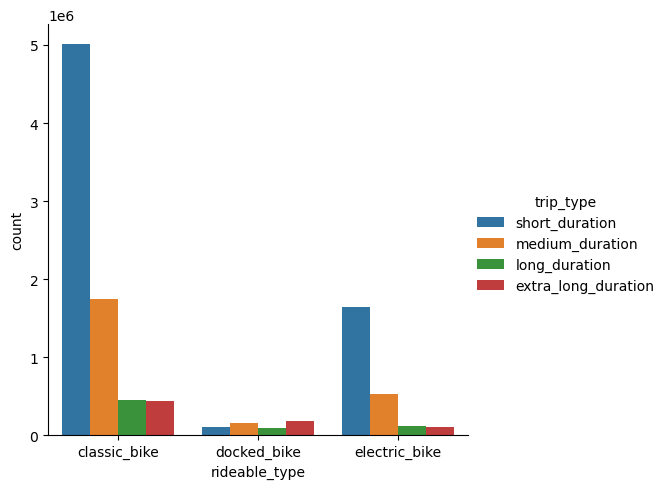

In [84]:
sns.catplot(data=bikes3, kind="count", x = "rideable_type", hue= "trip_type")

In [85]:
# busiest destinations
# which stations are busiest at the different times of day?

morning_time = bikes3[bikes3["time_of_day"]=="morning"]
morning_time_value_counts=morning_time["start_station_id"].value_counts()
busiest_station_morning= morning_time_value_counts.idxmax()
print(f"busiest morning station: {busiest_station_morning}")

afternoon_time = bikes3[bikes3["time_of_day"]=="afternoon"]
afternoon_time_value_counts=afternoon_time["start_station_id"].value_counts()
busiest_station_afternoon= afternoon_time_value_counts.idxmax()
print(f"busiest afternoon station: {busiest_station_afternoon}")

evening_time = bikes3[bikes3["time_of_day"]=="evening"]
evening_time_value_counts=evening_time["start_station_id"].value_counts()
busiest_station_evening= evening_time_value_counts.idxmax()
print(f"busiest evening station: {busiest_station_evening}")

night_time = bikes3[bikes3["time_of_day"]=="night"]
night_time_value_counts=night_time["start_station_id"].value_counts()
busiest_station_night= night_time_value_counts.idxmax()
print(f"busiest night station: {busiest_station_night}")

busiest morning station: 31229
busiest afternoon station: 31288
busiest evening station: 31623
busiest night station: 31114


In [86]:
top_stations = bikes3["start_station_id"].value_counts()
top50_stations_list = top_stations.head(50).index
top50_stations_list= list(top50_stations_list)


In [87]:
# check when is each station the busiest
top50_stations = bikes3[bikes3["start_station_id"].isin(top50_stations_list)]
top50_value_counts = top50_stations.groupby("start_station_id")["time_of_day"].value_counts(sort=False)
top50_value_counts.head(50)
# = bikes3.groupby("start_station_id")["time_of_day"].value_counts()
#TODO - check per station which is the busiest time


for station in top50_stations_list:
    print(f"busiest time of day in Station nr {station}: {top50_value_counts[station].idxmax()} ")


busiest time of day in Station nr 31229: evening 
busiest time of day in Station nr 31623: evening 
busiest time of day in Station nr 31201: evening 
busiest time of day in Station nr 31258: afternoon 
busiest time of day in Station nr 31247: afternoon 
busiest time of day in Station nr 31603: evening 
busiest time of day in Station nr 31288: afternoon 
busiest time of day in Station nr 31600: evening 
busiest time of day in Station nr 31101: morning 
busiest time of day in Station nr 31248: afternoon 
busiest time of day in Station nr 31613: afternoon 
busiest time of day in Station nr 31289: afternoon 
busiest time of day in Station nr 31200: afternoon 
busiest time of day in Station nr 31281: evening 
busiest time of day in Station nr 31202: evening 
busiest time of day in Station nr 31266: morning 
busiest time of day in Station nr 31627: evening 
busiest time of day in Station nr 31214: evening 
busiest time of day in Station nr 31125: evening 
busiest time of day in Station nr 31

In [88]:
# grid_counts = bikes2["grid_cell"].value_counts()

# print("Top 5 grid cells by number of rows:")
# print(grid_counts.head())

# # Histogram of grid cell sizes
# grid_counts.hist(bins=50)
# plt.title("Distribution of Rows per Grid Cell")
# plt.xlabel("Number of Rows")
# plt.ylabel("Frequency")
# plt.show()

In [89]:
# plt.scatter(bikes2["start_lng"], bikes2["start_lat"], s=1, alpha=0.5)
# plt.title("Station Coordinate Distribution")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

2. Strategies to Handle the Skew
Option 1: Adaptive Grid Sizes
Use smaller grid sizes in densely populated areas and larger sizes in sparse areas:

Identify Dense Areas: Determine grid cells with counts above a certain threshold.
Subdivide Dense Cells: Use a smaller grid size for those specific cells.

In [90]:
# # Define a threshold for dense cells
# dense_threshold = grid_counts.quantile(0.95)  # Top 5% of grid cells

# # Identify dense grid cells
# dense_cells = grid_counts[grid_counts > dense_threshold].index

# # Flag rows in dense cells
# bikes2["is_dense"] = bikes2["grid_cell"].isin(dense_cells)

# # Subdivide dense cells with a smaller grid size
# dense_grid_size = chosen_grid_size / 2
# bikes2.loc[bikes2["is_dense"], "sub_grid_cell"] = (
#     (bikes2["start_lat"] // dense_grid_size).astype(int).astype(str) + "_" +
#     (bikes2["start_lng"] // dense_grid_size).astype(int).astype(str)
# )

# # Use the refined grid cell where applicable
# bikes2["final_grid_cell"] = bikes2["sub_grid_cell"].fillna(bikes2["grid_cell"])

In [91]:
#TODO - season and public holidays features

# Calculate trip distance

In [92]:
from geopy.distance import geodesic

In [93]:
bikes_sample = bikes3.sample(n=5)

In [94]:
# start_coords1 = (bikes_sample['start_lat'], bikes_sample['start_lng'])
# end_coords1 = (bikes_sample['end_lat'], bikes_sample['end_lng'])
# bikes_sample["trip_distance"] = distance.distance(start_coords1, end_coords1).km

Here's the problem:

Input as entire columns, not individual rows:

bikes_sample['start_lat'] and bikes_sample['start_lng'] are entire columns of the DataFrame, not single values.
The distance.distance() function expects tuples of coordinates, e.g., (latitude, longitude), where each coordinate is a single value. However, you're passing an entire column for each coordinate, which results in invalid input.
Broadcasting issue:

distance.distance(start_coords1, end_coords1) cannot calculate distances for multiple points simultaneously unless explicitly vectorized. This function expects two tuples for a single pair of coordinates, not arrays or lists.
Correct Approach
To fix this, you need to calculate the distance row-by-row.

In [95]:
def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    return geodesic(start_coords, end_coords).kilometers

bikes_sample['distance_km'] = bikes_sample.apply(calculate_distance, axis=1)


In [96]:
bikes_sample["distance_km"] = round(bikes_sample['distance_km'],2)

In [97]:
bikes_sample

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_hour,year,month,day,dow,weekend,trip_duration_minutes,time_of_day,trip_type,distance_km
6786831,6786832,classic_bike,2023-03-19 12:07:26,2023-03-19 12:11:17,Hains Point/Buckeye & Ohio Dr SW,31273,Hains Point/Buckeye & Ohio Dr SW,31273,38.878433,-77.030230,...,12,2023,3,19,6,1,4.0,afternoon,short_duration,0.00
7578362,7578363,electric_bike,2023-05-19 22:48:06,2023-05-19 22:55:56,New York Ave & 15th St NW,31222,New Hampshire Ave & Ward Pl NW,31212,38.899088,-77.033357,...,22,2023,5,19,4,0,8.0,night,short_duration,1.42
6352045,6352046,classic_bike,2023-01-19 17:06:18,2023-01-19 17:18:08,22nd & H St NW,31127,17th & Corcoran St NW,31214,38.898925,-77.048852,...,17,2023,1,19,3,0,12.0,evening,short_duration,1.71
3960061,3960062,classic_bike,2022-06-04 22:44:02,2022-06-05 00:02:13,18th & C St NW,31284,18th & C St NW,31284,38.893511,-77.041544,...,0,2022,6,4,5,1,78.0,night,extra_long_duration,0.00
781142,781143,classic_bike,2021-05-26 19:22:12,2021-05-26 19:32:34,15th St & Pennsylvania Ave NW,31129,8th & O St NW,31281,38.896465,-77.033381,...,19,2021,5,26,2,0,10.0,evening,short_duration,1.64


In [99]:
bikes_dropped = bikes3.dropna(subset=["start_lat","start_lng", "end_lat","end_lng"])

create a sample with 1000 rows per month

In [100]:
samples = []

# Loop over years and months to sample 1,000 rows for each month
for year in range(2021, 2024):  # Covering 2021, 2022, and 2023
    for month in range(1, 13):  # Months from 1 to 12
        # Filter for the specific year and month
        filtered_data = bikes_dropped[(bikes_dropped["year"] == year) & (bikes_dropped["month"] == month)]
        
        # Sample 1,000 rows if there are enough rows available
        if len(filtered_data) >= 1000:
            sample = filtered_data.sample(n=1000, random_state=42)
        else:  # If less than 1,000 rows, take all available rows
            sample = filtered_data
            
        samples.append(sample)

# Combine all the samples into a single DataFrame
bikes_monthly_sample = pd.concat(samples, ignore_index=True)



The ideal sample size depends on several factors, including the variability of your data, the analyses you plan to perform, and the level of precision you require.
Statistical Guidelines
Statistical sampling often considers these factors:

Confidence Level: How confident do you want to be that your sample represents the population? Common values: 95% or 99%.
Margin of Error: How much error are you willing to tolerate in your estimates? Typical values: 5% or 1%.
Population Variability: How diverse is the dataset? Higher variability requires a larger sample.
For a population of 10 million and a 95% confidence level with a 5% margin of error, you need about 385 samples for statistical inferences. However, you're taking 36,000 samples, which is far larger than statistically required, so it should be representative.

If your system can handle a slightly larger dataset, you might consider sampling 50,000-100,000 rows (~0.5%-1% of the population) to reduce the risk of missing rare patterns.



In [101]:
bikes_monthly_sample

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,start_hour,end_hour,year,month,day,dow,weekend,trip_duration_minutes,time_of_day,trip_type
0,19856,classic_bike,2021-01-07 17:26:56,2021-01-07 17:40:19,Wilson Blvd & N Edgewood St,31019,Potomac & M St NW,31295,38.889000,-77.092500,...,17,17,2021,1,7,3,0,13.0,evening,short_duration
1,90818,classic_bike,2021-01-28 14:55:49,2021-01-28 14:59:57,15th & Euclid St NW,31117,New Hampshire Ave & T St NW,31229,38.923330,-77.035200,...,14,14,2021,1,28,3,0,4.0,afternoon,short_duration
2,74003,classic_bike,2021-01-22 18:21:07,2021-01-22 18:31:46,8th & Eye St SE / Barracks Row,31608,Lincoln Park / 13th & East Capitol St NE,31619,38.879200,-76.995300,...,18,18,2021,1,22,4,0,11.0,evening,short_duration
3,70281,classic_bike,2021-01-21 19:02:52,2021-01-21 19:19:27,Army Navy Dr & S Joyce St,31006,Crystal Dr & 23rd St S,31011,38.863700,-77.063300,...,19,19,2021,1,21,3,0,17.0,evening,medium_duration
4,34315,classic_bike,2021-01-11 19:12:30,2021-01-11 19:18:39,20th & E St NW,31204,25th St & Pennsylvania Ave NW,31237,38.896300,-77.045000,...,19,19,2021,1,11,0,0,6.0,evening,short_duration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,10680370,classic_bike,2023-12-30 10:41:16,2023-12-30 10:55:37,Potomac Ave & Half St SW,31648,4th St & Madison Dr NW,31288,38.869683,-77.010815,...,10,10,2023,12,30,5,1,14.0,morning,short_duration
35996,10537096,electric_bike,2023-12-12 09:43:19,2023-12-12 09:51:51,18th St & Wyoming Ave NW,31114,19th St & Pennsylvania Ave NW,31100,38.918788,-77.041578,...,9,9,2023,12,12,1,0,9.0,morning,short_duration
35997,10637906,electric_bike,2023-12-22 15:32:13,2023-12-22 15:41:43,15th St & New York Ave NW,31222,Massachusetts Ave & Dupont Circle NW,31200,38.899006,-77.033428,...,15,15,2023,12,22,4,0,10.0,afternoon,short_duration
35998,10623291,classic_bike,2023-12-20 18:37:35,2023-12-20 18:46:47,4th & E St SW,31244,Metro Center / 12th & G St NW,31230,38.884120,-77.017445,...,18,18,2023,12,20,2,0,9.0,evening,short_duration


In [102]:
def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    return geodesic(start_coords, end_coords).kilometers

bikes_monthly_sample['distance_km'] = bikes_monthly_sample.apply(calculate_distance, axis=1)
bikes_monthly_sample["distance_km"] = round(bikes_monthly_sample['distance_km'],2)

In [103]:
bikes_monthly_sample.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_hour,year,month,day,dow,weekend,trip_duration_minutes,time_of_day,trip_type,distance_km
0,19856,classic_bike,2021-01-07 17:26:56,2021-01-07 17:40:19,Wilson Blvd & N Edgewood St,31019,Potomac & M St NW,31295,38.88900,-77.0925,...,17,2021,1,7,3,0,13.0,evening,short_duration,2.99
1,90818,classic_bike,2021-01-28 14:55:49,2021-01-28 14:59:57,15th & Euclid St NW,31117,New Hampshire Ave & T St NW,31229,38.92333,-77.0352,...,14,2021,1,28,3,0,4.0,afternoon,short_duration,0.90
2,74003,classic_bike,2021-01-22 18:21:07,2021-01-22 18:31:46,8th & Eye St SE / Barracks Row,31608,Lincoln Park / 13th & East Capitol St NE,31619,38.87920,-76.9953,...,18,2021,1,22,4,0,11.0,evening,short_duration,1.39
3,70281,classic_bike,2021-01-21 19:02:52,2021-01-21 19:19:27,Army Navy Dr & S Joyce St,31006,Crystal Dr & 23rd St S,31011,38.86370,-77.0633,...,19,2021,1,21,3,0,17.0,evening,medium_duration,1.64
4,34315,classic_bike,2021-01-11 19:12:30,2021-01-11 19:18:39,20th & E St NW,31204,25th St & Pennsylvania Ave NW,31237,38.89630,-77.0450,...,19,2021,1,11,0,0,6.0,evening,short_duration,1.11


In [104]:
bikes_monthly_sample["distance_km"].describe()

count    36000.000000
mean         1.868928
std          1.506826
min          0.000000
25%          0.880000
50%          1.530000
75%          2.490000
max         20.450000
Name: distance_km, dtype: float64

In [105]:
bikes_monthly_sample["trip_duration_minutes"].describe()

count    36000.000000
mean        19.938833
std        139.432917
min          0.000000
25%          7.000000
50%         11.000000
75%         20.000000
max      24284.000000
Name: trip_duration_minutes, dtype: float64

In [106]:
zero_km = bikes_monthly_sample[bikes_monthly_sample["distance_km"] == 0]



In [107]:
zero_km["trip_type"].value_counts()

trip_type
short_duration         837
extra_long_duration    518
medium_duration        317
long_duration          211
Name: count, dtype: int64

In [ ]:
zero_to_one = bikes_monthly_sample[(bikes_monthly_sample["distance_km"] >= 0.0) & (bikes_monthly_sample["distance_km"] <= 1.0)]

In [108]:
bikes_monthly_sample["distance_km"].mode()

0    0.0
Name: distance_km, dtype: float64

In [109]:
bikes_monthly_sample["trip_duration_minutes"].mode()

0    8.0
Name: trip_duration_minutes, dtype: float64

[(0.0, 100.0)]

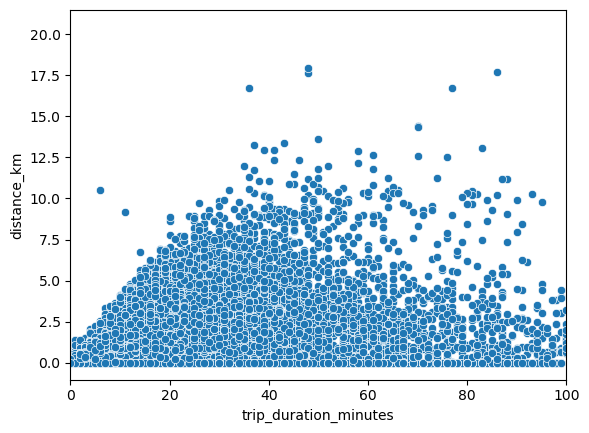

In [110]:
sns.scatterplot(data=bikes_monthly_sample, x="trip_duration_minutes", y="distance_km").set(xlim=(0,100))

to ride certain distance you need a certain amount of time, but the time alone doesn't that a distance was covered
The distance is from point A to final destination point b, but there could be many stops in between, or do a whole loop and come back to start station, so final distance = 0, but time_duration could be much larger. 

([<matplotlib.axis.XTick at 0x1faba33e0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

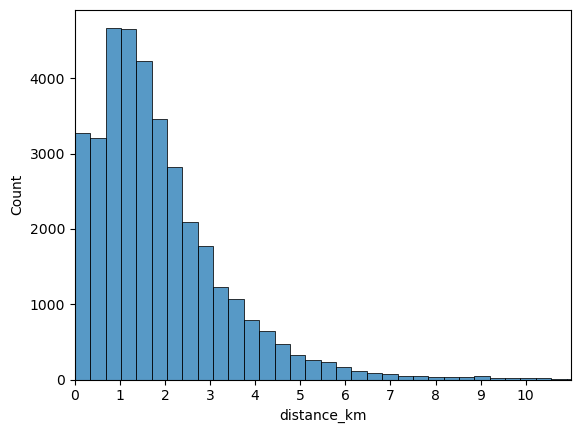

In [123]:
sns.histplot(data=bikes_monthly_sample, x="distance_km",bins=60).set(xlim=(0,11))
plt.xticks(np.arange(0, 11, 1))

#NOTE - the avg distance can gives us an idea of how close should stations be located


what's the distance between stations in concentrated and peripheral areas? 


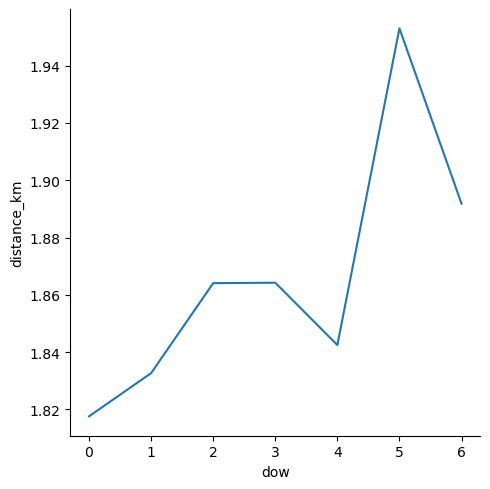

In [112]:
# which days do people ride longer distances?
avg_rides_per_hour = bikes_monthly_sample.groupby("dow", as_index=False)["distance_km"].mean()

avg_rides_per_hour
g= sns.relplot(kind="line", data= avg_rides_per_hour, x="dow",y="distance_km")
# # plt.legend(['week_day', 'weekends'])
# plt.xticks(np.arange(0, 24, 2))

In [ ]:
# 108.000 rows sample (3000 per month)
samples = []

# Loop over years and months to sample 1,000 rows for each month
for year in range(2021, 2024):  # Covering 2021, 2022, and 2023
    for month in range(1, 13):  # Months from 1 to 12
        # Filter for the specific year and month
        filtered_data = bikes_dropped[(bikes_dropped["year"] == year) & (bikes_dropped["month"] == month)]
        
        # Sample 1,000 rows if there are enough rows available
        if len(filtered_data) >= 3000:
            sample = filtered_data.sample(n=3000, random_state=42)
        else:  # If less than 3,000 rows, take all available rows
            sample = filtered_data
            
        samples.append(sample)

# Combine all the samples into a single DataFrame
bikes_monthly_sample_3000 = pd.concat(samples, ignore_index=True)

In [127]:
# csv to work with mapping

bikes_monthly_sample_3000.to_csv("bikes_sample.csv", index=False)